In [4]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

df = pd.read_csv('/Users/benzhao/Desktop/Python/AMZN.csv')
print(df)
###data of AMZN stock from 7/10/2019 - 7/9/2020


           Date  Close/Last   Volume       Open         High          Low
0    07/09/2020    $3182.63  6388659   $3115.99   $3193.8799   $3074.0016
1    07/08/2020    $3081.11  5037635   $3022.61     $3083.97   $3012.4301
2    07/07/2020    $3000.12  5257514   $3058.55     $3069.55        $2990
3    07/06/2020    $3057.04  6880642   $2934.97     $3059.88        $2930
4    07/02/2020     $2890.3  6593387   $2912.01     $2955.56   $2871.1021
..          ...         ...      ...        ...          ...          ...
248  07/16/2019     $2009.9  2618198   $2010.58   $2026.3196     $2001.22
249  07/15/2019    $2020.99  2981343    $2021.4      $2022.9     $2001.55
250  07/12/2019       $2011  2509297   $2008.27        $2017     $2003.87
251  07/11/2019    $2001.07  4317766   $2025.62      $2035.8      $1995.3
252  07/10/2019    $2017.41  4931902   $1996.51     $2024.94      $1995.4

[253 rows x 6 columns]


252    2017.41
251    2001.07
250    2011.00
249    2020.99
248    2009.90
        ...   
4      2890.30
3      3057.04
2      3000.12
1      3081.11
0      3182.63
Name:  Close/Last, Length: 253, dtype: float64


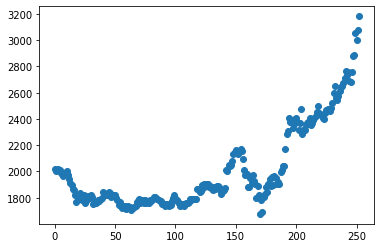

In [7]:
#cp=current price
#### data inputted showed most current price first rather than it last, so had to use [::-1] to reverse the values in array
cp=df.iloc[:,1].str[2:].astype(float)
cp=cp[::-1]
print(cp)
x=range(0, 253, 1)
plt.scatter(x,cp)

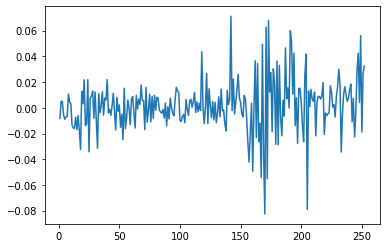

In [8]:
##find log_returns

log_returns=np.log(1+cp.pct_change())
plt.plot(x,log_returns)


In [9]:
#find mean, var, and drift log_returns
u=np.mean(log_returns)
print("mean", u)

var=np.var(log_returns)
print("variance" , var)

drift=np.array(u-.5*var)
print('drift', drift)

std=np.array(np.std(log_returns))
print("standard devation" , std)

mean 0.0018091007480289043
variance 0.00041049687334185624
drift 0.0016038523113579763
standard devation 0.02026072242892282


In [16]:
z=norm.ppf(np.random.normal(10,2))

### finding 20 theoretical stock paths within the next year
t_interval=365
iterations=5

In [17]:
daily_returns=np.exp(np.array(drift)+np.array(std)*norm.ppf(np.random.rand(t_interval,iterations)))
print(daily_returns)
type(daily_returns)

[[0.9899708  1.01107846 0.99555369 0.98826732 1.04232223]
 [1.02542051 0.98948605 1.02928364 1.03541828 0.98806206]
 [1.00741961 1.02686086 0.99196612 0.99915395 1.0233722 ]
 ...
 [0.99551744 0.9928258  0.99511795 0.99554677 1.01655292]
 [0.99213179 0.97830266 0.99404858 0.98889047 0.97862984]
 [1.03130579 1.00262566 1.0160416  1.02891848 1.02138165]]


numpy.ndarray

In [18]:
## price as of the day 7/9/2020: 3182.63
#fp represnts future prices
#make empty matrix with same size as daily_returns
s0=3182.63
fp=np.zeros_like(daily_returns)
fp

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [20]:
#make first price day of last stock in data set
fp[0]=s0
##Day t=day (t-1) *daily returns(t)
for t in range(1,t_interval):
    fp[t]=fp[t-1] * daily_returns[t]


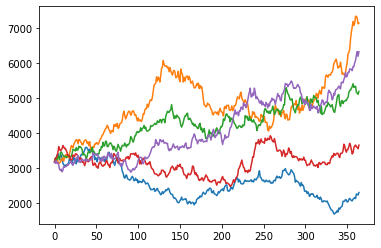

In [21]:
fp
len(fp)
plt.plot(fp)